In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set print options to display the full array
np.set_printoptions(threshold=np.inf)
pi=np.pi

In [11]:
#For a 100 by 100 in x and y (which gives 10000 x 10000 total)

erjhr = 60
# L=2
a=0.1
V0 = 1e5

nx = np.arange(1,erjhr+1,1)
ny = np.arange(1,erjhr+1,1)
nmax = len(ny) #Number of entries of x (or y) for the 'n' set of wavefunctions
mx = np.arange(1,erjhr+1,1)
my = np.arange(1,erjhr+1,1)
mmax = len(ny) #Number of entries of x (or y) for the 'm' set of wavefunctions

n_x = []
m_y = np.array([])

for i in range(0,erjhr):
    for j in range(0,erjhr):
        n_x.append(nx[i] + nmax*(ny[j]-1))
n_x = np.array(n_x)

m_y=n_x

# Creating the matrix
matrix = np.zeros((nmax**2,mmax**2))
# len(matrix[0])

In [12]:
# nx = mx and ny = my
def diag(nx, ny, mx, my, V0):
    n = nx
    m = ny
    n = mx
    m = my
    
    result_x = 1/4*(1-2*a+((-1)**n*np.sin(2*a*n*pi) / (n*pi))) + 1/4*(1-2*a+(np.sin((1+2*a)*n*pi)/(n*pi)))
    result_y = 1/4*(1-2*a+((-1)**m*np.sin(2*a*m*pi) / (m*pi))) + 1/4*(1-2*a+(np.sin((1+2*a)*m*pi)/(m*pi)))

    return (n**2+m**2)*pi**2 + 4*V0*result_x*result_y
def off_one(nx, ny, mx, my, V0):
    n = nx
    m = ny
    i = mx
    m = my

    result_x = (-np.sin(1/2*(2*a-1)*(i-n)*pi)/(i-n)+np.sin(1/2*(2*a-1)*(i+n)*pi)/(i+n))/(2*pi) + (-np.sin(1/2*(2*a+1)*(i-n)*pi)/(i-n)+np.sin(1/2*(2*a+1)*(i+n)*pi)/(i+n))/(2*pi)
    result_y = 1/4*(1-2*a+((-1)**m*np.sin(2*a*m*pi) / (m*pi))) + 1/4*(1-2*a+(np.sin((1+2*a)*m*pi)/(m*pi)))

    return 4*V0*(result_x*result_y)

def off_two(nx, ny, mx, my, V0):
    n = nx
    m = ny
    n = mx
    j = my

    result_x = 1/4*(1-2*a+((-1)**n*np.sin(2*a*n*pi) / (n*pi))) + 1/4*(1-2*a+(np.sin((1+2*a)*n*pi)/(n*pi)))
    result_y = (-np.sin(1/2*(2*a-1)*(j-m)*pi)/(j-m)+np.sin(1/2*(2*a-1)*(j+m)*pi)/(j+m))/(2*pi) + (-np.sin(1/2*(2*a+1)*(j-m)*pi)/(j-m)+np.sin(1/2*(2*a+1)*(j+m)*pi)/(j+m))/(2*pi)

    return 4*V0*(result_x*result_y)

def off_compl(nx, ny, mx, my, V0):
    n = nx
    m = ny
    i = mx
    j = my

    result_x = (-np.sin(1/2*(2*a-1)*(i-n)*pi)/(i-n)+np.sin(1/2*(2*a-1)*(i+n)*pi)/(i+n))/(2*pi) + (-np.sin(1/2*(2*a+1)*(i-n)*pi)/(i-n)+np.sin(1/2*(2*a+1)*(i+n)*pi)/(i+n))/(2*pi)
    result_y = (-np.sin(1/2*(2*a-1)*(j-m)*pi)/(j-m)+np.sin(1/2*(2*a-1)*(j+m)*pi)/(j+m))/(2*pi) + (-np.sin(1/2*(2*a+1)*(j-m)*pi)/(j-m)+np.sin(1/2*(2*a+1)*(j+m)*pi)/(j+m))/(2*pi)

    return 4*V0*(result_x*result_y)




In [13]:
#'n-1' th row, and 'm-1' th column


def entries(nx, ny, mx, my, V0):
    if nx == mx and ny == my:
        return diag(nx, ny, mx, my, V0)
    elif nx != mx and ny == my:
        return off_one(nx, ny, mx, my, V0)
    elif nx == mx and ny != my:
        return off_two(nx, ny, mx, my, V0)
    elif nx != mx and ny != my:
        return off_compl(nx, ny, mx, my, V0)


def indices(o,p,q,r, V0):
    n = o+nmax*(p-1)
    m = q+nmax*(r-1)
    matrix[n-1][m-1] = entries(o,p,q,r,V0)

#Matrix entry: indices(o,p,q,r)[0][1]
for o in range(1,erjhr+1):
    for p in range(1,erjhr+1):
        for q in range(1,erjhr+1):
            for r in range(1,erjhr+1):
                indices(o,p,q,r, V0)

eigenvalues, eigenvectors = np.linalg.eigh(matrix)


In [14]:
ab = eigenvectors[:,0]

In [15]:
def psi(x,y):
    psi_final = 0
    
    for i in range(1,erjhr+1):
        for j in range(1,erjhr+1):
            psi = ab[i-1+nmax*(j-1)]*(2)*np.sin((i)*pi*(x+1/2))*np.sin((j)*pi*(y+1/2))
            psi_final += psi
    return psi_final

# def psi(x,y):
#     psi_final = 0
    
#     for n in range(0,100):
#         psi = ab[n]*(2/L)*np.sin((n+1)*pi*(x+1/2))*np.sin((n+1)*pi*(y+1/2))
#         psi_final += psi
#     return psi_final

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define the function

# Step 2: Create a grid of x and y values
x = np.linspace(-1/2, 1/2, 1000)
y = np.linspace(-1/2, 1/2, 1000)
x, y = np.meshgrid(x, y)

# Step 3: Compute z values
z = abs(psi(x, y))


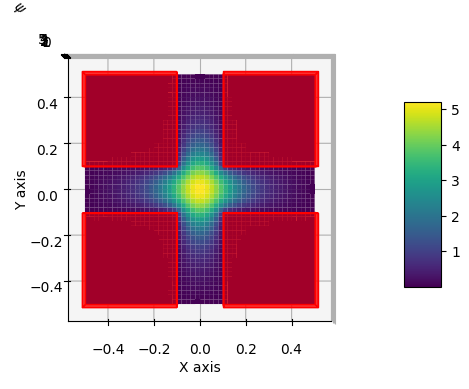

In [30]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Step 4: Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Step 5: Plot the surface
# Step 5: Plot the surface with a colormap
surface = ax.plot_surface(x, y, z, cmap='viridis')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Step 6: Set the top view angle
ax.view_init(elev=90, azim=-90)  # Elevation 10 degrees, azimuth -60 degrees for a true top-down view

# Optional: Add labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel(r'$\psi$')

# Step 7: Add solid boxes
def draw_solid_box(ax, x_range, y_range, z_min, z_max, color='red'):
    x_min, x_max = x_range
    y_min, y_max = y_range

    # Define the corners of the bottom and top of the box
    bottom_corners = np.array([
        [x_min, y_min, z_min],
        [x_max, y_min, z_min],
        [x_max, y_max, z_min],
        [x_min, y_max, z_min]
    ])
    top_corners = np.array([
        [x_min, y_min, z_max],
        [x_max, y_min, z_max],
        [x_max, y_max, z_max],
        [x_min, y_max, z_max]
    ])

    # Draw the faces of the box
    faces = [
        [bottom_corners[0], bottom_corners[1], bottom_corners[2], bottom_corners[3]],
        [top_corners[0], top_corners[1], top_corners[2], top_corners[3]],
        [bottom_corners[0], bottom_corners[1], top_corners[1], top_corners[0]],
        [bottom_corners[1], bottom_corners[2], top_corners[2], top_corners[1]],
        [bottom_corners[2], bottom_corners[3], top_corners[3], top_corners[2]],
        [bottom_corners[3], bottom_corners[0], top_corners[0], top_corners[3]]
    ]

    for face in faces:
        poly3d = [[face[0], face[1], face[2], face[3]]]
        ax.add_collection3d(Poly3DCollection(poly3d, facecolors=color, linewidths=1, edgecolors='r', alpha=.5))

# Define the height of the boxes
z_min = 0
z_max = np.max(z)

# Draw each solid box with the specified z_min and z_max values
draw_solid_box(ax, (-1/2, -a), (-1/2, -a), z_min, z_max)
draw_solid_box(ax, (a, 1/2), (-1/2, -a), z_min, z_max)
draw_solid_box(ax, (a, 1/2), (a, 1/2), z_min, z_max)
draw_solid_box(ax, (-1/2, -a), (a, 1/2), z_min, z_max)

ax.set_box_aspect([1,1,0.2])
# Show the plot
plt.show()

